In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

# KNN Classifiers

## Instructions
Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct.

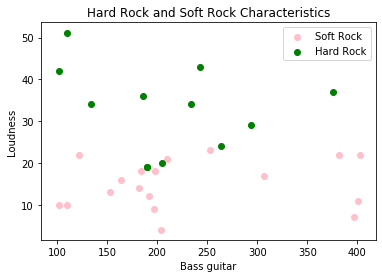

In [9]:
from sklearn.neighbors import KNeighborsClassifier
music = pd.DataFrame()

# Some data to play with.
music['bass_guitar'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are hard rock or not.
music['hardrock'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['hardrock'] == 1].bass_guitar,
    music[music['hardrock'] == 1].loudness,
    color='pink'
)
plt.scatter(
    music[music['hardrock'] == 0].bass_guitar,
    music[music['hardrock'] == 0].loudness,
    color='green'
)
plt.legend(['Soft Rock', 'Hard Rock'])
plt.title('Hard Rock and Soft Rock Characteristics')
plt.xlabel('Bass guitar')
plt.ylabel('Loudness')
plt.show()

In [11]:
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'bass_guitar']]
Y = music.hardrock
neighbors.fit(X,Y)

## Predict for a song with 30 units of loudness that's 300 notes of bass guitar.
neighbors.predict([[10, 300]])

array([1])

### Observation:
Looks like our model is predicting that 30 units of loudness, 300 notes of bass guitar is not hard rock. 

In [13]:
#Changed our nearest neighbor to 6.
neighbors = KNeighborsClassifier(n_neighbors=6)
X = music[['loudness', 'bass_guitar']]
Y = music.hardrock
neighbors.fit(X,Y)

## Predict for a song with 30 units of loudness that's 300 notes of bass guitar.
neighbors.predict([[10, 300]])

array([0])

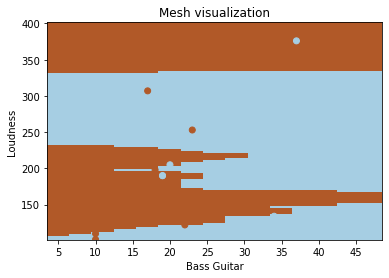

In [14]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 3.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Bass Guitar')
plt.ylabel('Loudness')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# Module 19.3 KNN Classifier 

Split into four main categories: groceries, dining out, utilities, and entertainment. 
1) What are some ways you might use KNN to create this model? 
A1) If we are trying to predict how the consumer will spend after his/her first intial purchase, KNN classifier can help organize where these spending categories will pop up based on behavior characteristics on spending in the first instance. For example, spending on first purchase determines the thresshold by asking what's bought based on nearest data point and then the next nearest data point, which could be a related item. 
a) Is item "amount over $17" --as in daily spending based on minimum wage. 
b) Can the first purchase be found in Walmart/CVS/Walgreens? 
c) Does the purchase spoil?
d) Is purchase one time use? or last for a month?

2) What aspects of KNN would be useful? It would be useful because it is a low cost, low energy intensive model-- or nicknamed "lazy" because no training or test sets needed. "Classifiers can be updated online at very little cost as new instances with known classes are presented", according to http://theprofessionalspoint.blogspot.com/2019/02/advantages-and-disadvantages-of-knn.html


# Module 19.4: KNN Regression

## Add the other feature and mess around with  𝑘  and weighting to see if we can do any better than we've done so far.

In [18]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]



In [21]:
#Adding another variable
music['interact_bpm_duration'] = music['duration'] * music['bpm']
music.head()

,duration,loudness,bpm,interact_bpm_duration
0,184,18,105,19320
1,134,34,90,12060
2,243,43,78,18954
3,186,36,75,13950
4,122,22,120,14640


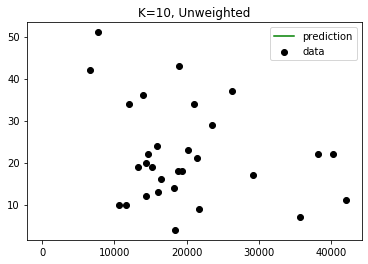

In [24]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.interact_bpm_duration)
Y = music.loudness
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

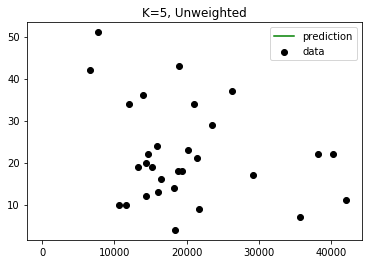

In [25]:
#Change 'neighbor' to 5
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
X = pd.DataFrame(music.interact_bpm_duration)
Y = music.loudness
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=5, Unweighted')
plt.show()

Analysis: No prediction line occurs. 

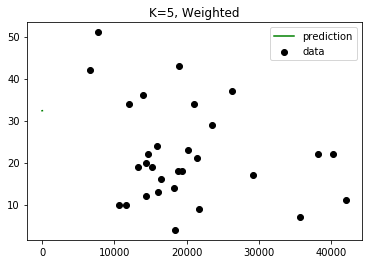

In [34]:
#Run same Model with 'weights'

knn_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
X = pd.DataFrame(music.interact_bpm_duration)
Y = music.loudness
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=5, Weighted')
plt.show()

In [35]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.48 (+/- 0.83)
Weighted Accuracy: -0.80 (+/- 1.90)


We didn't improve the model by adding in a new feature, which was an interaction between 'bpm' and 'duration'. The weighted accuracy is worse than the unweighted after running the k-cross validation.